In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating plots
import statsmodels.api as sm  # For estimating statistical models
import io
from google.colab import files  # For file operations in Google Colab
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.stats.api as sms
import plotly.express as px
from scipy.stats import f_oneway

# Import Excel File

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Gets the filename of the uploaded file

Without_TOT = pd.read_excel(io.BytesIO(uploaded[filename]))  # Reads the uploaded file into a DataFrame
Without_TOT.to_csv('/content/data.csv', index=False)
print("Data saved as CSV file.")

Saving Without_TOT.xlsx to Without_TOT (1).xlsx
Data saved as CSV file.


# Splitting Code

In [ ]:
# Splitting season column into a new column called "Starting Year" for Without_TOT.

# Creating column "Starting Year" as an integer from column season that's a string
Without_TOT['StartingYear'] = Without_TOT['Season'].apply(lambda x: int(x.split('-')[0]))

# Check to see if Starting Year column is created
Without_TOT.columns

Index(['Player', 'Position', 'Team', 'GP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'Personal_Fouls', 'PTS', 'Season',
       'StartingYear'],
      dtype='object')

## Splitting "StartingYear" Column into the 4 Periods


In [ ]:
# Split each DF into 4 periods, 2000-2004, 2005-2009, 2010-2014, 2015-2019

# Use pd.cut() function to bin years into different periods
years_needed = [2000, 2004, 2009, 2014, 2019]
each_period = ['2000-2004', '2005-2009', '2010-2014', '2015-2019']

Without_TOT['Period'] = pd.cut(Without_TOT['StartingYear'], bins=years_needed, labels=each_period, right=False)


# Code verification
Checking_Period = (Without_TOT['Period'] == '2000-2004')
unique_tot_values = Without_TOT[Checking_Period]['Period'].unique()
print(unique_tot_values)

['2000-2004']
Categories (4, object): ['2000-2004' < '2005-2009' < '2010-2014' < '2015-2019']


In [ ]:
Without_TOT.columns

Index(['Player', 'Position', 'Team', 'GP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'Personal_Fouls', 'PTS', 'Season',
       'StartingYear', 'Period'],
      dtype='object')

# ANOVA for 3PA, 3P, 3P%

**3PA (SIGNIFICANT)**

**3PM (SIGNIFICANT)**

**3P% (SIGNIFICANT)**


In [ ]:
f_statistic, p_value = f_oneway(
    Without_TOT[Without_TOT['Period'] == '2000-2004']['3PA'],
    Without_TOT[Without_TOT['Period'] == '2005-2009']['3PA'],
    Without_TOT[Without_TOT['Period'] == '2010-2014']['3PA'],
    Without_TOT[Without_TOT['Period'] == '2015-2019']['3PA'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

f_statistic, p_value

F-statistic: 134.88608316328344
P-value: 3.683163836941251e-85


(134.88608316328344, 3.683163836941251e-85)

In [ ]:
f_statistic, p_value = f_oneway(
    Without_TOT[Without_TOT['Period'] == '2000-2004']['3P'],
    Without_TOT[Without_TOT['Period'] == '2005-2009']['3P'],
    Without_TOT[Without_TOT['Period'] == '2010-2014']['3P'],
    Without_TOT[Without_TOT['Period'] == '2015-2019']['3P'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

f_statistic, p_value

F-statistic: 117.91390407651765
P-value: 1.1849792308120092e-74


(117.91390407651765, 1.1849792308120092e-74)

In [ ]:
# Dropping NAN values
X = Without_TOT.dropna(subset=['3P%'])

f_statistic, p_value = f_oneway(
    X[X['Period'] == '2000-2004']['3P%'],
    X[X['Period'] == '2005-2009']['3P%'],
    X[X['Period'] == '2010-2014']['3P%'],
    X[X['Period'] == '2015-2019']['3P%'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

f_statistic, p_value



F-statistic: 30.79703440016305
P-value: 9.084311761427754e-20


(30.79703440016305, 9.084311761427754e-20)

# ANOVA for FTA, FT, FT%

**FTA (SIGNIFICANT)**

**FTM (SIGNIFICANT)**

**FT% (SIGNIFICANT)**

In [ ]:
f_statistic, p_value = f_oneway(
    Without_TOT[Without_TOT['Period'] == '2000-2004']['FTA'],
    Without_TOT[Without_TOT['Period'] == '2005-2009']['FTA'],
    Without_TOT[Without_TOT['Period'] == '2010-2014']['FTA'],
    Without_TOT[Without_TOT['Period'] == '2015-2019']['FTA'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

f_statistic, p_value



alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('ANOVA is significant. There is a significant difference in means.')
else:
    print('ANOVA is not significant. There is no significant difference in means.')

F-statistic: 14.87932196871713
P-value: 1.1751694703126508e-09
ANOVA is significant. There is a significant difference in means.


In [ ]:

f_statistic, p_value = f_oneway(
    Without_TOT[Without_TOT['Period'] == '2000-2004']['FT'],
    Without_TOT[Without_TOT['Period'] == '2005-2009']['FT'],
    Without_TOT[Without_TOT['Period'] == '2010-2014']['FT'],
    Without_TOT[Without_TOT['Period'] == '2015-2019']['FT'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

f_statistic, p_value


alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('ANOVA is significant. There is a significant difference in means between periods.')
else:
    print('ANOVA is not significant. There is no significant difference in means.')

F-statistic: 11.176950406478879
P-value: 2.575849328311606e-07
ANOVA is significant. There is a significant difference in means between periods.


In [ ]:
X = Without_TOT.dropna(subset=['FT%'])

f_statistic, p_value = f_oneway(
    X[X['Period'] == '2000-2004']['FT%'],
    X[X['Period'] == '2005-2009']['FT%'],
    X[X['Period'] == '2010-2014']['FT%'],
    X[X['Period'] == '2015-2019']['FT%'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

f_statistic, p_value


alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('ANOVA is significant. There is a significant difference in means between periods.')
else:
    print('ANOVA is not significant. There is no significant difference in means.')

F-statistic: 8.96120769517314
P-value: 6.365269219354219e-06
ANOVA is significant. There is a significant difference in means between periods.


# ANOVA for 2P%

**2P% (SIGNIFICANT)**

In [ ]:
X = Without_TOT.dropna(subset=['2P%'])

f_statistic, p_value = f_oneway(
    X[X['Period'] == '2000-2004']['2P%'],
    X[X['Period'] == '2005-2009']['2P%'],
    X[X['Period'] == '2010-2014']['2P%'],
    X[X['Period'] == '2015-2019']['2P%'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

f_statistic, p_value

alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('ANOVA is significant. There is a significant difference in means.')
else:
    print('ANOVA is not significant. There is no significant difference in means.')

F-statistic: 150.54960206453043
P-value: 8.414729175601258e-95
ANOVA is significant. There is a significant difference in means.


# ANOVA for Personal Fouls (PF)

**PF (SIGNIFICANT)**

In [ ]:
f_statistic, p_value = f_oneway(
    Without_TOT[Without_TOT['Period'] == '2000-2004']['Personal_Fouls'],
    Without_TOT[Without_TOT['Period'] == '2005-2009']['Personal_Fouls'],
    Without_TOT[Without_TOT['Period'] == '2010-2014']['Personal_Fouls'],
    Without_TOT[Without_TOT['Period'] == '2015-2019']['Personal_Fouls'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

f_statistic, p_value


alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('ANOVA is significant. There is a significant difference in means between periods.')
else:
    print('ANOVA is not significant. There is no significant difference in means.')

F-statistic: 60.70631614994785
P-value: 8.817713375455905e-39
ANOVA is significant. There is a significant difference in means between periods.


# Post Hoc Analysis for Personal Fouls (PF)

In [ ]:
from statsmodels.stats import multitest

# Bonferroni Test
# Significance Level

alpha = 0.05
adj_p = alpha/6

adj_p

0.008333333333333333

In [ ]:
# Creating PF by Period dataframes
pf_period_2000_2004 = Without_TOT[Without_TOT['Period'] == '2000-2004'][['Personal_Fouls', 'Period']]
pf_period_2005_2009 = Without_TOT[Without_TOT['Period'] == '2005-2009'][['Personal_Fouls', 'Period']]
pf_period_2010_2014 = Without_TOT[Without_TOT['Period'] == '2010-2014'][['Personal_Fouls', 'Period']]
pf_period_2015_2019 = Without_TOT[Without_TOT['Period'] == '2015-2019'][['Personal_Fouls', 'Period']]

pf_period_2000_2004 = pd.DataFrame(pf_period_2000_2004)
pf_period_2005_2009 = pd.DataFrame(pf_period_2005_2009)
pf_period_2010_2014 = pd.DataFrame(pf_period_2010_2014)
pf_period_2015_2019 = pd.DataFrame(pf_period_2015_2019)

In [ ]:
# T-Test PF Period 1 vs. Period 2
t_stat, p_value = ttest_ind(pf_period_2000_2004['Personal_Fouls'], pf_period_2005_2009['Personal_Fouls'], alternative = "greater")

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:}")

alpha = 0.05
if p_value <= alpha:
  print('It is significant')
else:
  print('It is not significant')


# T-Test 1 Bonferroni
adj_p = 0.01666666666
if p_value <= adj_p:
  print('THE BONFERRONI is significant. This means the difference in means for 2000-2004 vs 2005-2009 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.')
else:
  print('BONFERRONI IS NOT SIGNIFICANT')

T-statistic: -0.99
P-value: 0.8378444202904622
NOT SIGNIFICANT
BONFERRONI IS NOT SIGNIFICANT


In [ ]:
# T-Test PF Period 1 vs. Period 3
t_stat, p_value = ttest_ind(pf_period_2000_2004['Personal_Fouls'], pf_period_2010_2014['Personal_Fouls'], alternative = "greater")

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:}")

alpha = 0.05
if p_value <= alpha:
  print('It is significant')
else:
  print('It is not significant')


# T-Test 2 Bonferroni
adj_p = 0.01666666666
if p_value <= adj_p:
  print('THE BONFERRONI is significant. This means the difference in means for 2000-2004 vs 2005-2009 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.')
else:
  print('BONFERRONI IS NOT SIGNIFICANT')

T-statistic: 6.96
P-value: 2.0599232090710223e-12
It is significant
THE BONFERRONI is significant. This means the difference in means for 2000-2004 vs 2005-2009 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.


In [ ]:
# T-Test PF Period 1 vs. Period 4
t_stat, p_value = ttest_ind(pf_period_2000_2004['Personal_Fouls'], pf_period_2015_2019['Personal_Fouls'], alternative = "greater")

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:}")

alpha = 0.05
if p_value <= alpha:
  print('It is significant')
else:
  print('It is not significant')


# T-Test 1 Bonferroni
adj_p = 0.01666666666
if p_value <= adj_p:
  print('THE BONFERRONI is significant. This means the difference in means for 2000-2004 vs 2005-2009 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.')
else:
  print('BONFERRONI IS NOT SIGNIFICANT')

T-statistic: 9.64
P-value: 5.055745487541813e-22
It is significant
THE BONFERRONI is significant. This means the difference in means for 2000-2004 vs 2005-2009 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.


In [ ]:
# T-Test PF Period 2 vs. Period 3
t_stat, p_value = ttest_ind(pf_period_2005_2009['Personal_Fouls'], pf_period_2010_2014['Personal_Fouls'], alternative = "greater")

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:}")

alpha = 0.05
if p_value <= alpha:
  print('It is significant')
else:
  print('It is not significant')


# T-Test 2 Bonferroni
adj_p = 0.01666666666
if p_value <= adj_p:
  print('THE BONFERRONI is significant. This means the difference in means for 2005-2009 vs 2010-2014 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.')
else:
  print('THE BONFERRONI is NOT significant')

T-statistic: 8.69
P-value: 2.539327947244108e-18
It is significant baby
THE BONFERRONI is significant. This means the difference in means for 2005-2009 vs 2010-2014 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.


In [ ]:
# T-Test PF Period 2 vs. Period 4
t_stat, p_value = ttest_ind(pf_period_2005_2009['Personal_Fouls'], pf_period_2015_2019['Personal_Fouls'], alternative = "greater")

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:}")

alpha = 0.05
if p_value <= alpha:
  print('It is significant')
else:
  print('It is not significant')


# T-Test 2 Bonferroni
adj_p = 0.01666666666
if p_value <= adj_p:
  print('THE BONFERRONI is significant. This means the difference in means for 2005-2009 vs 2010-2014 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.')
else:
  print('THE BONFERRONI is NOT significant')

T-statistic: 11.64
P-value: 3.777696148813103e-31
It is significant baby
THE BONFERRONI is significant. This means the difference in means for 2005-2009 vs 2010-2014 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.


In [ ]:
# T-Test PF Period 2 vs. Period 3
t_stat, p_value = ttest_ind(pf_period_2010_2014['Personal_Fouls'], pf_period_2015_2019['Personal_Fouls'], alternative = "greater")

print(f"T-statistic: {t_stat:.2}")
print(f"P-value: {p_value:}")

alpha = 0.05
if p_value <= alpha:
  print('It is significant.')
else:
  print('It is not significant')


# T-Test 3 Bonferroni
adj_p = 0.01666666666
if p_value <= adj_p:
  print('THE BONFERRONI is significant. This means the difference in means for 2010-2014 vs 2015-2019 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.')
else:
  print('THE BONFERRONI is NOT significant')

T-statistic: 2.8
P-value: 0.0029132667990092536
It is significant baby
THE BONFERRONI is significant. This means the difference in means for 2010-2014 vs 2015-2019 is statistically significant, even after adjusting for the increased risk of Type I error due to multiple comparisons.


# Bar Plot - Personal Fouls ANOVA Results

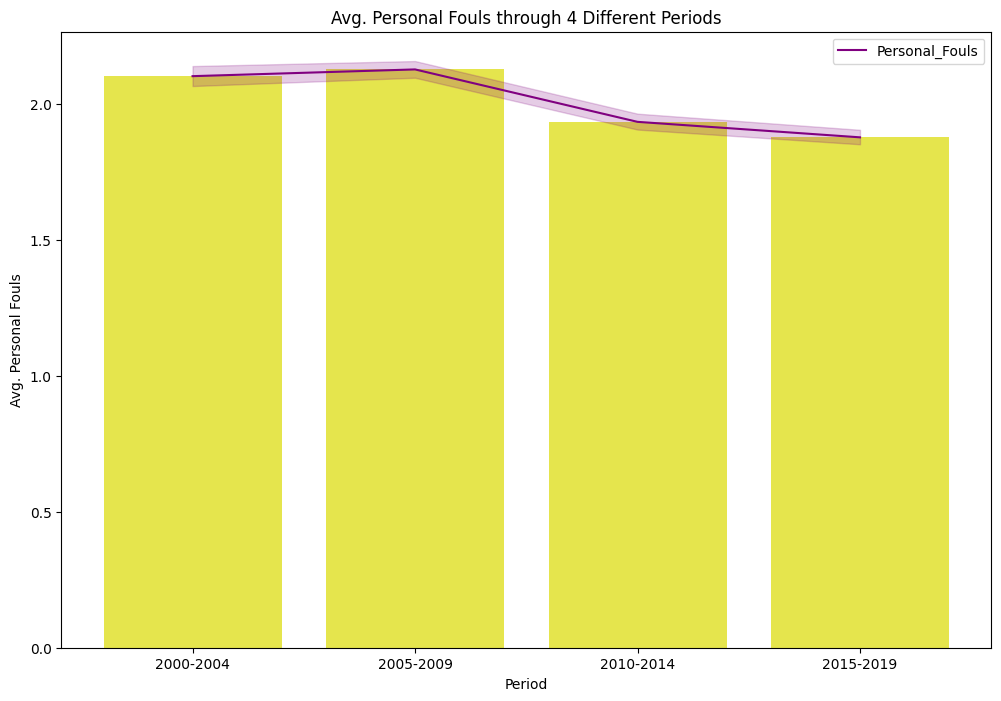

In [ ]:
# Make dataset by dividing years into 4 periods
combined_periods = pd.concat([pf_period_2000_2004, pf_period_2005_2009, pf_period_2010_2014, pf_period_2015_2019])

# Make dataframe grouping by period
grouped_data = combined_periods.groupby('Period')['Personal_Fouls'].mean().reset_index()

# Sort by mean of PF values in descending order
sorted_data = grouped_data.sort_values(by='Personal_Fouls', ascending=False)

# Plot chart
plt.figure(figsize=(12, 8))

# Plot for mean PF values
sns.barplot(x='Period', y='Personal_Fouls', data=sorted_data, color='yellow', alpha=0.8)
sns.lineplot(x=Without_TOT['Period'], y=Without_TOT['Personal_Fouls'], label='Personal_Fouls', color='purple')

plt.xlabel('Period')
plt.ylabel('Avg. Personal Fouls')
plt.title('Avg. Personal Fouls through 4 Different Periods')
plt.show()